In [ ]:
#Se importan las librearias que vamos a utilizar
import pandas as pd 
import numpy as np
import seaborn as sns
#Se lee ela archivo csv y se convierte en DataFrame mediante pandas
df=pd.read_csv('European_Rosters.csv')

In [ ]:
#Se visualiza los datos puros
df

,FullName,PlayerName,Affiliation,League,Jersey,Birth Date,Age,birthPlace,Height (meters),Citizenship 1,...,Youth Club 7,nationality,Games Played,Market Value (Euros),Last Updated Date,Accumulated Transfer Sums (Euros),Highest Market Value (Euros),Highest Market Value Date,NationalTeamCaps,MostRecentInjury
0,Anthony Mbu Agogo Modeste,Anthony Modeste,1. FC Koln,Bundesliga,#27,4/14/1988,31,Cannes,1.87,France,...,NaN,France,1,7000000.0,"Last update: Jun 12, 2019",45700000,20000000.0,6/19/2017,16,NaN
1,NaN,Benno Schmitz,1. FC Koln,Bundesliga,#2,11/17/1994,25,München,1.82,Germany,...,NaN,Germany,0,1000000.0,"Last update: Jun 12, 2019",1000000,1750000.0,3/22/2017,11,NaN
2,Birger Danny Verstraete,Birger Verstraete,1. FC Koln,Bundesliga,#8,4/16/1994,25,Oostende,1.75,Belgium,...,NaN,Belgium,0,4000000.0,"Last update: Jun 10, 2019",4850000,4000000.0,9/11/2018,1,NaN
3,Brady Canfield Scott,Brady Scott,1. FC Koln,Bundesliga,#31,6/30/1999,20,"Petaluma, California",1.87,United States,...,NaN,United States,14,100000.0,"Last update: Jun 12, 2019",0,100000.0,8/3/2018,0,NaN
4,NaN,Christian Clemens,1. FC Koln,Bundesliga,#17,8/4/1991,28,Köln,1.79,Germany,...,NaN,Germany,15,1750000.0,"Last update: Jun 12, 2019",7950000,3500000.0,6/29/2013,5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4303,NaN,Olivier Deschacht,Zulte Waregem,Jupiler Pro League,#45,2/16/1981,38,Gent,1.87,Belgium,...,NaN,Belgium,0,100000.0,"Last update: Jun 10, 2019",0,3500000.0,10/4/2004,20,NaN
4304,Omar Nicolás Govea García,Omar Govea,Zulte Waregem,Jupiler Pro League,#10,1/18/1996,23,San Luis Potosí,1.76,Mexico,...,NaN,Mexico,0,2000000.0,"Last update: Jun 10, 2019",2000000,2500000.0,1/9/2018,3,NaN
4305,NaN,Saido Berahino,Zulte Waregem,Jupiler Pro League,#38,8/4/1993,26,Bujumbura,1.79,Burundi,...,NaN,Burundi,4,5000000.0,"Last update: Jun 28, 2019",13900000,15000000.0,7/1/2015,10,Unknown Injury: Return unknown
4306,Sammy Andre Bossut,Sammy Bossut,Zulte Waregem,Jupiler Pro League,#1,8/11/1985,34,Tielt,1.86,Belgium,...,NaN,Belgium,13,600000.0,"Last update: Jun 10, 2019",0,2000000.0,6/28/2014,1,NaN


In [ ]:
#Se saca el porcentaje de valores nullos dentro de cada columna de los datos
(df.isnull().sum() / len(df))*100

FullName                             52.367688
PlayerName                            0.000000
Affiliation                           0.000000
League                                0.000000
Jersey                                1.601671
Birth Date                            0.000000
Age                                   0.000000
birthPlace                            3.667595
Height (meters)                       1.926648
Citizenship 1                         0.232126
Citizenship 2                        82.776230
Position                              1.578459
Position 2                            0.023213
Foot                                  4.874652
Agent                                15.993500
JoinedClub                           43.407614
LastExtension                        67.084494
ContractExpiration                    8.751161
PlayerSponsor                        77.576602
Youth Club 1                         30.246054
Youth Club 2                         56.313835
Youth Club 3 

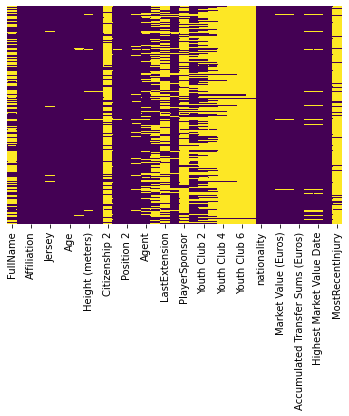

In [ ]:
# Se realiza un representacion de un heatmap de los valores nulos dentro de los Datos
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')


In [ ]:
#Se eliminan las columnas con un porcentaje mayor al 30% de valores nulos de los datos
df.drop(labels=['FullName','Birth Date','Citizenship 2','LastExtension','PlayerSponsor','JoinedClub','Youth Club 1','Youth Club 2','Youth Club 3'
                ,'Youth Club 4','Youth Club 5','Youth Club 6','Youth Club 7','Last Updated Date','Highest Market Value Date'],axis=1,inplace=True)

In [ ]:
# Esta es la unica columnas que no eliminamos dentro de los datos que tienen mas de 30% de los datos nulos,
# ya que en este caso los valores nulos hacen referencia a que el jugador
# no ha presentado ninguna lesion y por eso los valores nulos se reemplanzan por cero ha siendo referencia que cero es no han tenido lesion
# y 1 si han presentado lesion
df['MostRecentInjury']=df['MostRecentInjury'].fillna(0)
df.loc[df['MostRecentInjury'] !=0, 'MostRecentInjury'] = 1

In [ ]:
#Los valores nulos de la columnas de agent se reemplazan por "No agent"
# haciendo referencia que nulos es que no se conoce quien esl agente de representacion del jugador
df['Agent']=df['Agent'].fillna('no agent')

In [ ]:
#Para mayor facilidad del manejo de los datos se convierte la altura de los jugadores de metros a centimetros 
# y se borrar la columna de altura en metro y se deja en unicamente la altura de centrimetros
df['Height (cm)']=df['Height (meters)']*100
df.drop(labels=['Height (meters)'],axis=1,inplace=True)


In [ ]:

(df.isnull().sum() / len(df))*100

PlayerName                           0.000000
Affiliation                          0.000000
League                               0.000000
Jersey                               1.601671
Age                                  0.000000
birthPlace                           3.667595
Citizenship 1                        0.232126
Position                             1.578459
Position 2                           0.023213
Foot                                 4.874652
Agent                                0.000000
ContractExpiration                   8.751161
nationality                          0.000000
Games Played                         0.000000
Market Value (Euros)                 0.441040
Accumulated Transfer Sums (Euros)    0.000000
Highest Market Value (Euros)         5.037140
NationalTeamCaps                     0.000000
MostRecentInjury                     0.000000
Height (cm)                          1.926648
dtype: float64

In [ ]:
#en caso de que hallan valores duplicados se eliminan mediante la siguiente linea de codigo
df = df.drop_duplicates()

In [ ]:
df

,PlayerName,Affiliation,League,Jersey,Age,birthPlace,Citizenship 1,Position,Position 2,Foot,Agent,ContractExpiration,nationality,Games Played,Market Value (Euros),Accumulated Transfer Sums (Euros),Highest Market Value (Euros),NationalTeamCaps,MostRecentInjury,Height (cm)
0,Anthony Modeste,1. FC Koln,Bundesliga,#27,31,Cannes,France,Forward,Centre-Forward,right,no agent,30.06.2023,France,1,7000000.0,45700000,20000000.0,16,0,187.0
1,Benno Schmitz,1. FC Koln,Bundesliga,#2,25,München,Germany,Defender,Right-Back,right,Kögl & Partner GmbH,30.06.2022,Germany,0,1000000.0,1000000,1750000.0,11,0,182.0
2,Birger Verstraete,1. FC Koln,Bundesliga,#8,25,Oostende,Belgium,Midfielder,Defensive Midfield,right,SportPlus Football ...,30.06.2023,Belgium,0,4000000.0,4850000,4000000.0,1,0,175.0
3,Brady Scott,1. FC Koln,Bundesliga,#31,20,"Petaluma, California",United States,Goalkeeper,Goalkeeper,right,PRO FC,30.06.2021,United States,14,100000.0,0,100000.0,0,0,187.0
4,Christian Clemens,1. FC Koln,Bundesliga,#17,28,Köln,Germany,Midfielder,Right Midfield,right,DC International ...,30.06.2021,Germany,15,1750000.0,7950000,3500000.0,5,0,179.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4303,Olivier Deschacht,Zulte Waregem,Jupiler Pro League,#45,38,Gent,Belgium,Defender,Centre-Back,left,Eleven Management,30.06.2020,Belgium,0,100000.0,0,3500000.0,20,0,187.0
4304,Omar Govea,Zulte Waregem,Jupiler Pro League,#10,23,San Luis Potosí,Mexico,Midfielder,Defensive Midfield,right,no agent,30.06.2022,Mexico,0,2000000.0,2000000,2500000.0,3,0,176.0
4305,Saido Berahino,Zulte Waregem,Jupiler Pro League,#38,26,Bujumbura,Burundi,Forward,Centre-Forward,right,Sync Global Sports,30.06.2021,Burundi,4,5000000.0,13900000,15000000.0,10,1,179.0
4306,Sammy Bossut,Zulte Waregem,Jupiler Pro League,#1,34,Tielt,Belgium,Goalkeeper,Goalkeeper,left,Govan Sports,30.06.2021,Belgium,13,600000.0,0,2000000.0,1,0,186.0


In [ ]:
# Y por ulitmo se eliminan los valores nulos de los datos que son faltantes.
df=df.dropna()

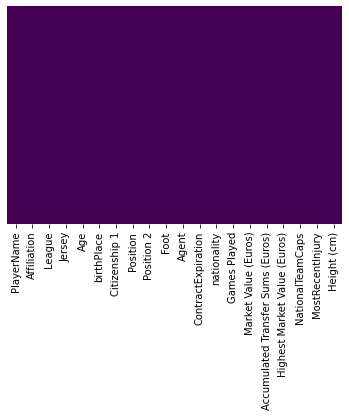

In [ ]:
#se visualiza que de nuevo un heatmap de los valores nulos y se evidencia que nos tenemos valores nulos
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
#Para mayor facilidad mas adelante en el manejo de datos , se ponen en mayuscula todos valores de texto dentro de los datos 
df=df.apply(lambda x: x.astype(str).str.upper())

In [ ]:
# se verfica que unicamente no hallan 4 posiciones ,NOTA: ejemplo no se encuentren valores como defender y defense que hacen referencia 
# a la misma Posicion pero python los toma diferentes entonces toca verificar que no hallan posicion repetidas con diferente nombre  
df['Position'].value_counts()

DEFENDER       1225
MIDFIELDER     1009
FORWARD         985
GOALKEEPER      395
Name: Position, dtype: int64

In [ ]:
#el mismo analisis al anterior a la linea de arriba pero para la ligas 
df['League'].value_counts()

SERIE A               492
BUNDESLIGA            472
PREMIER LEAGUE        466
LALIGA                456
LIGUE 1               416
PREMIER LIGA          388
LIGA NOS              359
EREDIVISIE            352
JUPILER PRO LEAGUE    213
Name: League, dtype: int64

In [ ]:
#se crea una lista de los valores de las ligas 
a=df['League'].value_counts().reset_index()
b=list(a['index'])
b

['SERIE A',
 'BUNDESLIGA',
 'PREMIER LEAGUE',
 'LALIGA',
 'LIGUE 1',
 'PREMIER LIGA',
 'LIGA NOS',
 'EREDIVISIE',
 'JUPILER PRO LEAGUE']

In [ ]:
#Se hace un for para verificar de acuerdo a cada liga que no hallan equipos repetidos con diferente nombre.
for i in range(0,len(b)):
  a=df[df['League']==b[i]]
  print(a['Affiliation'].value_counts())

FIORENTINA         28
JUVENTUS           27
CAGLIARI CALCIO    27
HELLAS VERONA      27
SSC NAPOLI         26
SASSUOLO           26
LAZIO              26
GENOA              26
AS ROMA            25
UDINESE CALCIO     25
INTER              24
SAMPDORIA          24
AC MILAN           24
BRESCIA            23
LECCE              23
PARMA              23
BOLOGNA            22
SPAL               22
ATALANTA           22
TORINO             22
Name: Affiliation, dtype: int64
UNION BERLIN       30
F. DUSSELDORF      30
FC AUGSBURG        30
1.FSV MAINZ 05     30
VFL WOLFSBURG      28
BOR. M'GLADBACH    28
TSG HOFFENHEIM     27
E. FRANKFURT       27
HERTHA BSC         27
1. FC KOLN         26
SC PADERBORN       25
FC SCHALKE 04      25
WERDER BREMEN      25
RB LEIPZIG         24
BAYERN MUNICH      24
SC FREIBURG        23
BOR. DORTMUND      23
BAY. LEVERKUSEN    20
Name: Affiliation, dtype: int64
NEWCASTLE         27
WATFORD           26
BOURNEMOUTH       25
BRIGHTON          25
SPURS           

In [ ]:
df['nationality'].value_counts()


SPAIN          356
FRANCE         300
GERMANY        271
RUSSIA         257
NETHERLANDS    249
              ... 
TANZANIA         1
SYRIA            1
CHINA            1
ESTONIA          1
BURUNDI          1
Name: nationality, Length: 116, dtype: int64

In [ ]:
df['Foot'].value_counts()

RIGHT    2555
LEFT      886
BOTH      173
Name: Foot, dtype: int64

In [ ]:
df.dtypes

PlayerName                           object
Affiliation                          object
League                               object
Jersey                               object
Age                                  object
birthPlace                           object
Citizenship 1                        object
Position                             object
Position 2                           object
Foot                                 object
Agent                                object
ContractExpiration                   object
nationality                          object
Games Played                         object
Market Value (Euros)                 object
Accumulated Transfer Sums (Euros)    object
Highest Market Value (Euros)         object
NationalTeamCaps                     object
MostRecentInjury                     object
Height (cm)                          object
dtype: object

In [ ]:
# se convierten los las columnas numerica en int para mayor facilidad de los datos 
df['Market Value (Euros)']=df['Market Value (Euros)'].astype(float).astype(int)
df['Games Played']=df['Games Played'].astype(int)
df['NationalTeamCaps']=df['NationalTeamCaps'].astype(int)
df['Age']=df['Age'].astype(int)
df['Height (cm)']=df['Height (cm)'].astype(float).astype(int)

In [ ]:
df.dtypes

PlayerName                           object
Affiliation                          object
League                               object
Jersey                               object
Age                                   int64
birthPlace                           object
Citizenship 1                        object
Position                             object
Position 2                           object
Foot                                 object
Agent                                object
ContractExpiration                   object
nationality                          object
Games Played                          int64
Market Value (Euros)                  int64
Accumulated Transfer Sums (Euros)    object
Highest Market Value (Euros)         object
NationalTeamCaps                      int64
MostRecentInjury                     object
Height (cm)                           int64
dtype: object